#### <center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter

In [534]:
import pandas as pd
import numpy as np
import plotly.express as px
import kaleido

# Изменить значение данной переменной для отображения интерактивных диаграмм Plotly
px_mode = 'png'

# 1. Исследование структуры данных

1.1. Файл csv с исходной базой резюме доступен по [ссылке](https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view?usp=sharing). 

Работа над данным проектом проводилась с локальной копией базы резюме (соответствующий файл csv не включен в проект на github из-за превышения допустимого размера).

In [535]:
df_hh = pd.read_csv('data/hh.csv', sep=';')
#df_hh = pd.read_csv('https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view?usp=sharing', sep=';')

1.2. Выведем несколько первых строк таблицы, чтобы убедиться в том, что данные не повреждены.

In [536]:
df_hh.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


1.3. Выведем основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [537]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

1.4. Выведем основную статистическую информацию о столбцах.


In [538]:
df_hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# 2. Преобразование данных

## 2.1. Признак **"Образование"** 

Начнем с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

При выполнении преобразования воспользуемся тем, что текущий уровень образования соискателя всегда находится в первых двух словах и начинается с заглавной буквы.

In [539]:
df_hh['Образование'] = df_hh['Образование и ВУЗ'].apply(lambda x: x.partition(' образование')[0]).astype('category')
display(df_hh['Образование'].value_counts())

df_hh.drop('Образование и ВУЗ', axis=1, inplace=True)

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

## 2.2. Признаки **"Пол"** и **"Возраст"** 
Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создадим два новых признака **"Пол"** и **"Возраст"**:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

In [540]:
# Для нового признака пола достаточно вытащить первую букву из имеющегося признака
df_hh['Пол'] = df_hh['Пол, возраст'].apply(lambda x: x[0]).astype('category')
print("Процент женских резюме:", round(df_hh['Пол'].value_counts()['Ж'] / df_hh.shape[0] * 100, 2), '%')

# Для числового признака возраста извлечем и сконвертируем в тип int 
# соответствующее "слово" исходного признака
df_hh['Возраст'] = df_hh['Пол, возраст'].apply(lambda x: int((x.split(sep=',')[1]).split()[0]))
print("Средний возраст соискателей:", df_hh['Возраст'].mean().round())

df_hh.drop('Пол, возраст', axis=1, inplace=True)

Процент женских резюме: 19.07 %
Средний возраст соискателей: 32.0


## 2.3. Признак **"Опыт работы (месяц)"** 
Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Условия выполнения преобразования:
* В исходном признаке есть пропуски. Если мы встречаем пропуск, оставляем его как есть.
* В исходном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* Нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)

In [541]:
# Сделаем из скрытых пропусков (значение "Не указано") настоящие пропуски
df_hh.loc[df_hh['Опыт работы'] == "Не указано", ["Опыт работы"]] = np.nan

# Функция преобразования исходного строкого признака в количество месяцев
def convert_to_months(x: str) ->int:
    if pd.notna(x):
        x = x.split()
        # Если годы не указаны, то сразу вовзвращаем месяцы
        if 'мес' in x[3]:
            return int(x[2])
        # Годы умножаем на 12 и прибавляем месяцы (если они указаны)
        return 12 * int(x[2]) + (int(x[4]) if x[4].isdigit() else 0)
    return np.nan
    
df_hh['Опыт работы (месяц)'] = df_hh['Опыт работы'].apply(convert_to_months)
df_hh.drop('Опыт работы', axis=1, inplace=True)

print('Медианное значение опыта работы:', df_hh['Опыт работы (месяц)'].median(), 'мес.')

Медианное значение опыта работы: 100.0 мес.


## 2.4. Признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**
Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные будут обозначены как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель, нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. 
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. 
    У некоторых соискателей "потерялась" информация о готовности к командировкам. Будем считать, что такие соискатели не готовы к командировкам.

In [542]:
million = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара',
           'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

capital = ["Москва", "Санкт-Петербург"]

# Функция преобразования к признаку "Город":
# Если в списке capital, оставляем без изменений.
# Если списке million, заменяем на категорию "город-милионник".
# Все остальные города – "другие"
def extract_city(x: str) -> str:
    x = x.split(sep=',')[0].strip()
    res = x if x in capital else ("город-миллионник" if x in million else "другие")
    return res

df_hh['Город'] = df_hh['Город, переезд, командировки'].apply(extract_city).astype('category')

print("Процент соискателей, живущих в Санкт-Петербурге:", 
      round((df_hh['Город'] == "Санкт-Петербург").mean() * 100), '%')

Процент соискателей, живущих в Санкт-Петербурге: 11 %


In [543]:
# В зависимости от того, указано исходном признаке метро или нет,
# информация о готовности к переезду будет после первой, либо после второй запятой.
def extract_relocation(x: str) -> bool:
    x = [a for a in x.lower().split(sep=',')[1:3] if 'перее' in a][0] # ПЕРЕЕзд, ПЕРЕЕхать и т.д.
    return 'не ' not in x

df_hh['Готовность к переезду'] = df_hh['Город, переезд, командировки'].apply(extract_relocation).astype(bool)

In [544]:
# Информация о готовности к командировкам в исходном признаке
# находится после второй запятой, либо далее, либо отсутствует
def extract_travel(x: str) -> bool:
    try:
        x = [a for a in x.lower().split(sep=',')[2:] if 'командиров' in a][0]
    except IndexError:
        # Если командировки не упоминаются, считаем, что соискатель не готов к ним
        return False
    return 'не ' not in x

df_hh['Готовность к командировкам'] = df_hh['Город, переезд, командировки'].apply(extract_travel).astype(bool)

print("Процент соискателей, готовых и к переездам, и к командировкам:",
      round(((df_hh['Готовность к командировкам'] == True) & (df_hh['Готовность к переезду'] == True)).mean() * 100), '%')

df_hh.drop('Город, переезд, командировки', axis=1, inplace=True)

Процент соискателей, готовых и к переездам, и к командировкам: 32 %


## 2.5.  **"Занятость"** и **"График"**
Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. 

Создадим признаки-мигалки (метод One Hot Encoding) для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

In [545]:
# Сначала составим списки категорий занятости и графика,
# применив к соответствующим столбцам специальную функцию
employment = set()
schedule = set()
def get_categories(x: str, glob_set: set):
    x = [a.strip() for a in x.lower().split(',')]
    glob_set.update(x)
    
df_hh['Занятость'].apply(get_categories, args=(employment,))
df_hh['График'].apply(get_categories, args=(schedule,))

# Создадим и заполним булевыми значениями новые признаки-мигалки
for feature in employment:
    df_hh[feature.capitalize()] = df_hh['Занятость'].apply(lambda x: feature in x).astype(bool)
for feature in schedule:
    df_hh[feature.capitalize()] = df_hh['График'].apply(lambda x: feature in x).astype(bool)

df_hh.drop(['Занятость', 'График'], axis=1, inplace=True)

df_hh.head(3)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Стажировка,Волонтерство,Проектная работа,Полная занятость,Частичная занятость,Полный день,Гибкий график,Удаленная работа,Вахтовый метод,Сменный график
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,...,False,False,True,True,True,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,...,False,False,True,True,True,True,True,True,False,True
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,...,False,False,False,True,False,True,False,False,False,False


## 2.6. Признак желаемой заработной платы в рублях **"ЗП (руб)"** 
В некоторых резюме исходного датасета, заработная плата указана в валюте, отличной от рублей, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Необходимо привести заработную плату к единой валюте - рублям.

Необходимую информацию с курсами валют, встречающихся в исходном датасете, возьмем из таблицы ExchangeRates.csv, заранее выгруженной с сайта mdf.ru:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).

Дату, по которой определяется курс будем брать из признака **"Обновление резюме"**.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак **"ЗП (руб)"** - заработная плата в рублях.


In [546]:
# Оставим в признаке "Обновление резюме" только дату
df_hh['Обновление резюме'] = pd.to_datetime(df_hh['Обновление резюме']).dt.date

# Добавим временный вспомогательный признак с ISO-кодом валюты
to_ISO = {
    'сум': 'UZS',
    'AZN': 'AZN', 
    'бел.руб.': 'BYN', 
    'KZT': 'KZT', 
    'USD': 'USD', 
    'грн.': 'UAH', 
    'руб.': 'RUB', 
    'KGS': 'KGS', 
    'EUR': 'EUR'
}
df_hh['Currency'] = df_hh['ЗП'].apply(lambda x: to_ISO[x.split()[-1]])

# Добавим временный вспомогательный признак с числовым значением заработной платы
df_hh['Зарплата'] = df_hh['ЗП'].apply(lambda x: int(x.split()[0]))

# Загрузим в датафрейм таблицу с курсами валют
df_exchange = pd.read_csv('data/ExchangeRates.csv', sep=',')
# и преобразуем дату к нужному типу для последующего объединения таблиц
df_exchange['date'] = pd.to_datetime(df_exchange['date']).dt.date

# Объединим таблицы по признакам, соответствующим дате и валюте
df_hh = df_hh.merge(
    df_exchange[['date', 'currency', 'proportion', 'close']],
    left_on=['Обновление резюме', 'Currency'],
    right_on=['date', 'currency'],
    how='left'
)
# Там, где в исходном датасете зарплата была в рублях, образовались пропуски.
# Заполним их единицами (для последующей "конвертации" рублей в рубли)
df_hh.fillna({'proportion': 1, 'close': 1}, inplace=True)
# Конвертируем в рубли и сохраняем результат в новом признаке
df_hh['ЗП (руб)'] = df_hh['Зарплата'] * df_hh['close'] / df_hh['proportion']

# Удалим временные вспомогательные признаки
df_hh.drop(['ЗП', 'Currency', 'date', 'currency', 'proportion', 'close', 'Зарплата'], axis=1, inplace=True)

print("Медианная заработная плата составляет", round(df_hh['ЗП (руб)'].median() / 1000), "тыс. руб.")

Медианная заработная плата составляет 59 тыс. руб.


# 3. Исследование зависимостей в данных

## 3.1. Распределение признака **"Возраст"**. 

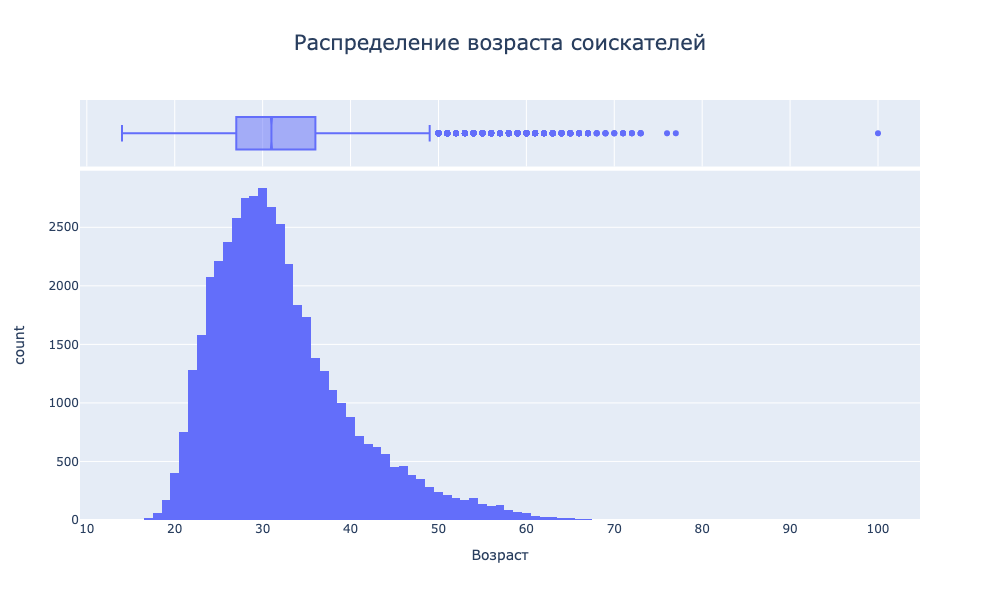

In [547]:
fig = px.histogram(
    df_hh, 
    x='Возраст', 
    width=1000, 
    height=600, 
    title="Распределение возраста соискателей",
    marginal='box'
)
fig.update_layout(title_x = 0.5, title_font_size=21)
fig.show(px_mode)

Модальное значение возраста соискателей составляет 30 лет.

Возраст в большинстве резюме находится в интервале от 27 до 36 лет.

Признак требует дальнейшего анализа на наличие аномалий, поскольку на гистограмме с первого взгляда заметно резюме соискателя возрастом 100 лет, а также присутствуют соискатели возрастом 76 и 77 лет, что нетипично для для поиска работы на hh.

Также на предмет выбросов следует проверить 14- и 15-летних соискателей.

## 3.2. Распределение признака **"Опыт работы (месяц)"**. 

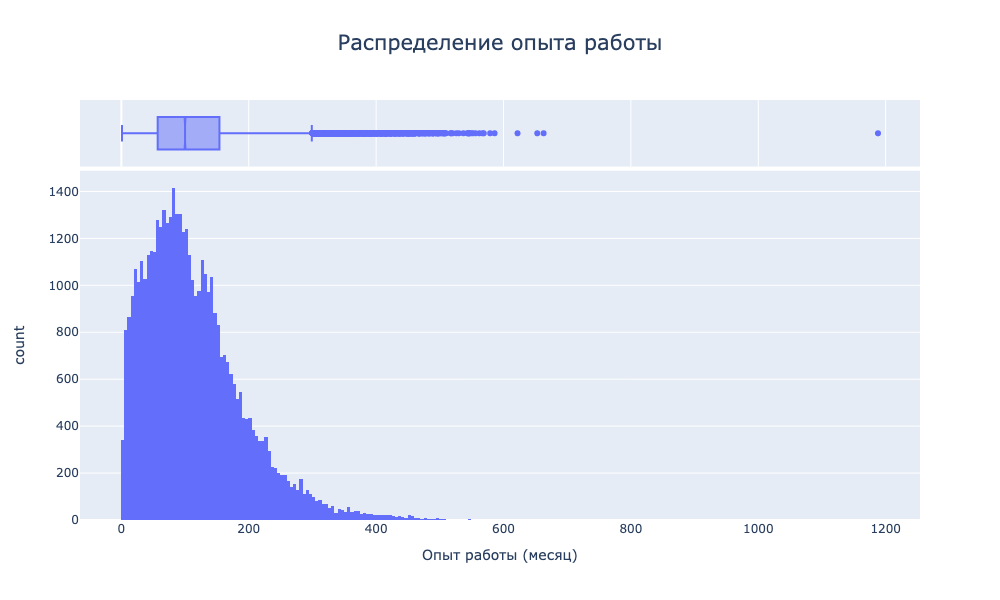

In [548]:
fig = px.histogram(
    df_hh, 
    x='Опыт работы (месяц)', 
    #color='Пол',
    width=1000, 
    height=600, 
    title="Распределение опыта работы",
    marginal='box'
)
fig.update_layout(title_x = 0.5, title_font_size=21)
fig.show(px_mode)

Модальное значение опыта работы составляет примерно 7 лет.

Большинсто соискателей указывают опыт работы от 57 до 154 месяцев (5-13 лет).

Видны потенциальные аномалии: опыт работы более 600 месяцев (50 лет) и один явный выброс – 1188 месяцев. Потребуется дополнительно посмотреть распределение опыта работы в зависимости от возраста соискателей для дополнительного поиска аномалий.

В целом, распределение напоминает логнормальное, что позволит при очистке данных применить метод z-отклонений.

## 3.3. Распределение признака **"ЗП (руб)"**. 

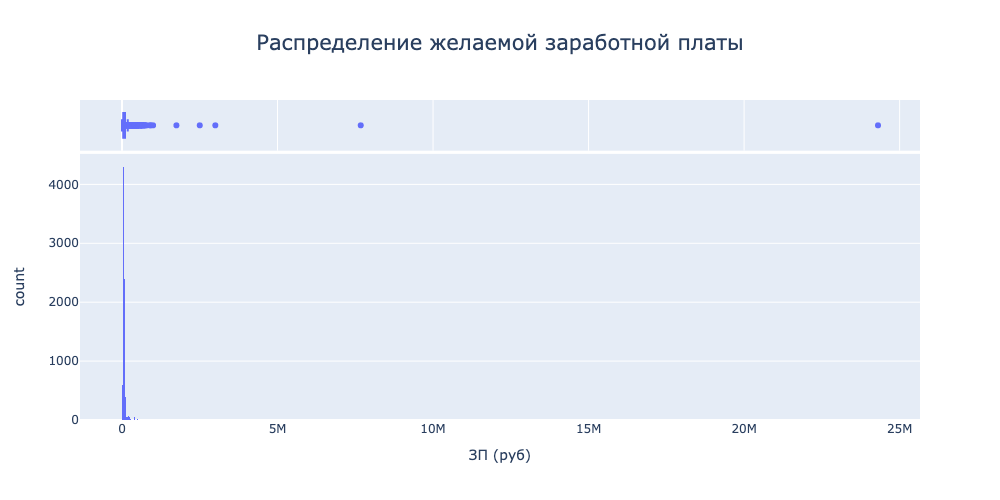

In [549]:
fig = px.histogram(
    df_hh, 
    x='ЗП (руб)', 
    width=1000, 
    height=500, 
    title="Распределение желаемой заработной платы",
    marginal='box'
)
fig.update_layout(title_x = 0.5, title_font_size=21)
fig.show(px_mode)

Из-за наличия аномальных значений (огромных желаемых заработных плат в несколько миллионов рублей) гистограмма совершенно не читаема.

Воспользовавшись интерактивными возможностями plotly (выделив нужную часть гистограммы), можем увидеть, что модальное значение заработной платы составляет 50 тыс.руб., а большинство соискателей указали зарплаты от 37 до 95 тыс.руб.

В дальнейшем нужно рассмотреть на предмет выбросов также слишком низкие заработные платы (возможно это волонтеры или частично занятые??).

## 3.4. Зависимость медианной желаемой заработной платы от уровня образования 
Используем данные о резюме, в которых желаемая заработная плата меньше 1 млн рублей.

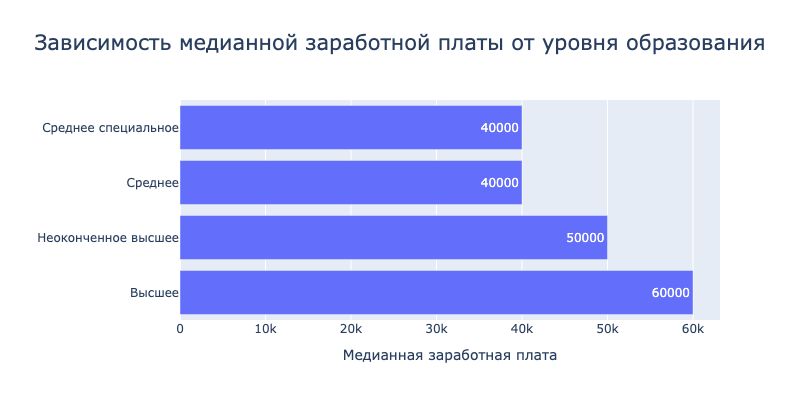

In [550]:
data = df_hh[df_hh['ЗП (руб)'] < 1000000].groupby('Образование', as_index=False)['ЗП (руб)'].median()
fig = px.bar(
    data, x='ЗП (руб)', 
    y='Образование', 
    width=800, height=400, orientation='h', 
    text='ЗП (руб)',
    title='Зависимость медианной заработной платы от уровня образования',
    labels={'ЗП (руб)': 'Медианная заработная плата', 'Образование': ''}
)
fig.update_layout(title_x=0.5, title_font_size=21)
fig.show(px_mode)

Как и ожидалось - с ростом уровня образования растет и величина желаемой заработной платы. При этом отсутствует разница между соискателями со средним и средним специальным уровнями образования.

Категория уровня образования будет иметь важное значение для будущей модели прогнозирования уровня заработной платы.

## 3.5. Распределение желаемой заработной платы в зависимости от города.
Используем данные о резюме, в которых желаемая заработная плата меньше 1 млн рублей.

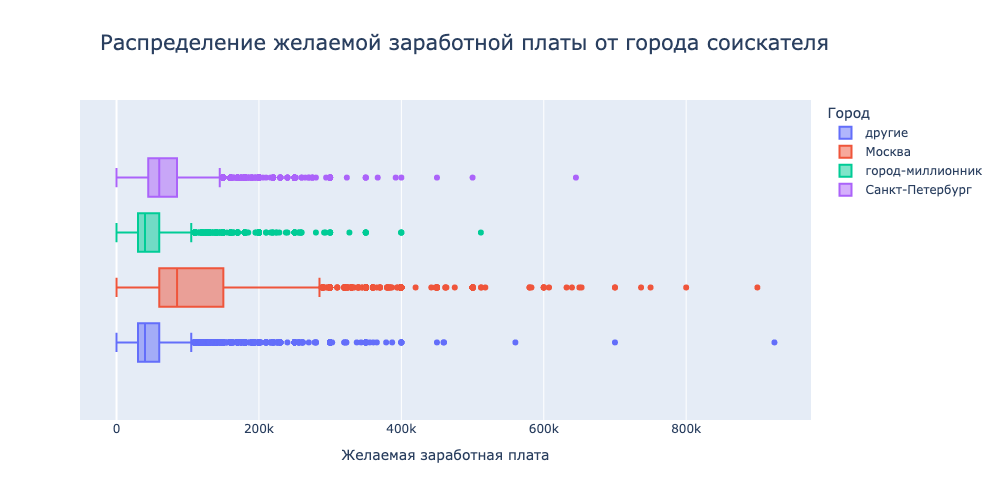

In [551]:
fig = px.box(
    df_hh[df_hh['ЗП (руб)'] < 1000000], 
    x='ЗП (руб)', 
    color='Город', 
    width=1000, height=500,
    title='Распределение желаемой заработной платы от города соискателя',
    labels={'ЗП (руб)': 'Желаемая заработная плата'}
)
fig.update_layout(title_x=0.1, title_font_size=21)
fig.show(px_mode)

Соискатели из Москвы и Санкт-Петербурга рассчитывают на более высокий уровень заработной платы (медиана в Москве - 85 000, в Питере - 60).

В остальных городах при медианном значении 40 тыс.руб. большинство соискателей указали зарплату от 30 до 60 тыс.руб.

В разрезе признака заработной платы разделение городов на "милионники" и "другие" не имеет практической пользы.

## 3.6. Зависимость медианной заработной платы от готовности к командировкам и переездам
Для визуализации данной зависимости подойдет многоуровневая столбчатая диаграмма.

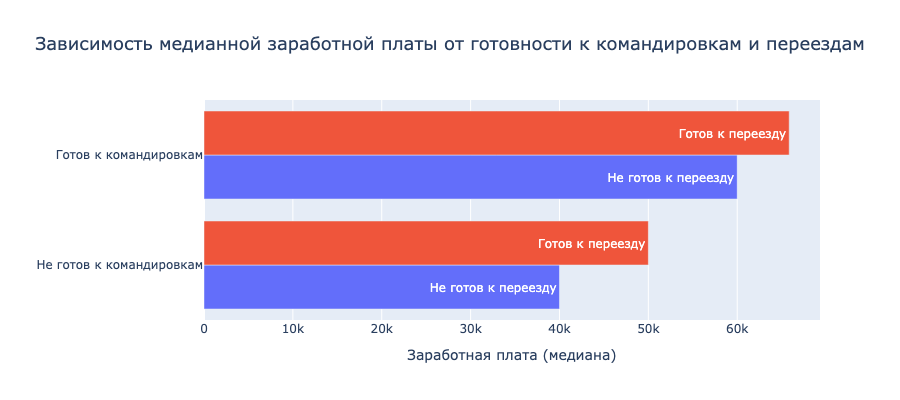

In [552]:
# Переименуем категории готовности к командировкам и готовности к переездам для более наглядного отображения
df_hh['Готовность к командировкам'] = df_hh['Готовность к командировкам'].astype('category').cat.rename_categories(
    {0: 'Не готов к командировкам', 1: 'Готов к командировкам'}
)
df_hh['Готовность к переезду'] = df_hh['Готовность к переезду'].astype('category').cat.rename_categories(
    {0: 'Не готов к переезду', 1: 'Готов к переезду'}
)

fig = px.bar(
    df_hh.groupby(['Готовность к командировкам', 'Готовность к переезду'], as_index=False)['ЗП (руб)'].median().round(),
    y='Готовность к командировкам',
    x='ЗП (руб)',
    color='Готовность к переезду',
    width=900, height=400, orientation='h',
    text='Готовность к переезду',
    barmode='group',
    title='Зависимость медианной заработной платы от готовности к командировкам и переездам',
    labels={'Готовность к командировкам': '', 'Готовность к переезду': '', 'ЗП (руб)': 'Заработная плата (медиана)'},
)
fig.update_traces(textfont_color='white', textfont_size=12, showlegend=False)
fig.update_layout(title_x=0.5, title_font_size=18)
fig.show(px_mode)

Чем больше "неудобств" готов принять соискатель для новой работы, тем на более высокую заработную плату он расчитывает: медиана зарплаты при готовности к командировкам и переезду в полтора раза выше, чем ожидания соискателя, который не хочет ни переезжать, ни ездить в командировки.

Таким образом, признаки готовности к командировкам и переездам будут оказывать ощутимое влияние на прогноз уровня заработной платы. 

## 3.7. Зависимость медианной заработной платы от возраста и образования
Визуализируем данную зависимость с помощью тепловой карты.

Для этого создадим сводную таблицу: по столбцам - возрастные категории соискателей, по строкам - уровень образования, значения - медианы желаемой заработной платы.

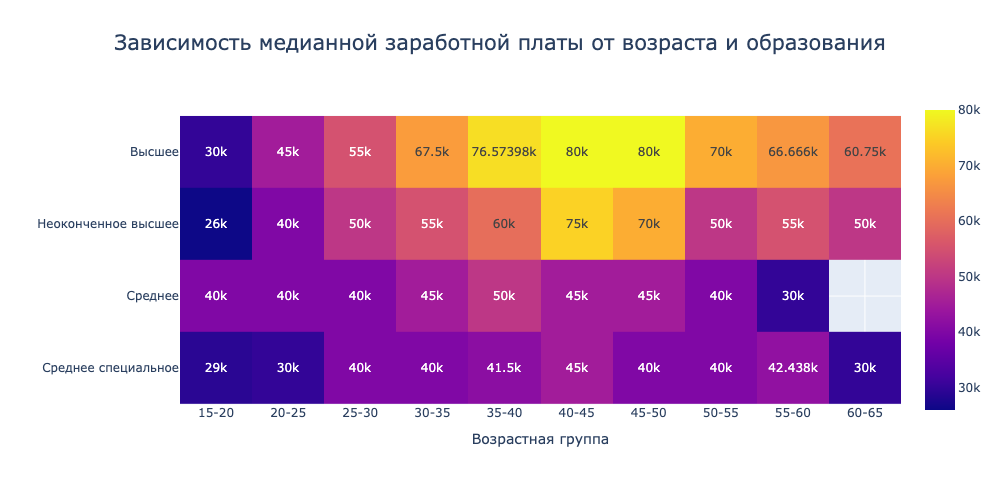

In [553]:
# Создадим дополнительный признак возрастной группы с шагом в 5 лет
df_hh['Возрастная группа'] = df_hh['Возраст'].apply(
    lambda x: str(a := (x // 5) * 5) + '-' + str(a + 5)
).astype('category')

# Теперь создадим сводную таблицу и построим на ее основе тепловую карту
pivot = df_hh[(df_hh['Возраст'] < 65) & (df_hh['Возраст'] >= 15)].pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возрастная группа',
    aggfunc='median'
)
fig = px.imshow(
    pivot, 
    width=1000, height=500, 
    title='Зависимость медианной заработной платы от возраста и образования',
    text_auto=True
)
fig.update_yaxes(title='')
fig.update_layout(title_x=0.5, title_font_size=21)
fig.show(px_mode)

Наибольшая интенсивность роста заработной платы закономерно наблюдается среди соискателей с высшим образованием.

Среднее специальное образование не дает преимущества перед средним с точки зрения величины ожидаемой заработной платы.

Наиболее высокие ожидания по размеру оплаты труда - у соискателей от 40 до 50 лет с высшим образованием.

## 3.8. Зависимость опыта работы от возраста 
Опыт работы переведем из месяцев в годы (чтобы признаки были в едином масштабе). 
Дополнительно на графике построим прямую y=x-13.
Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (соискатель начал трудиться до того, как ему исполнилось 14 лет).

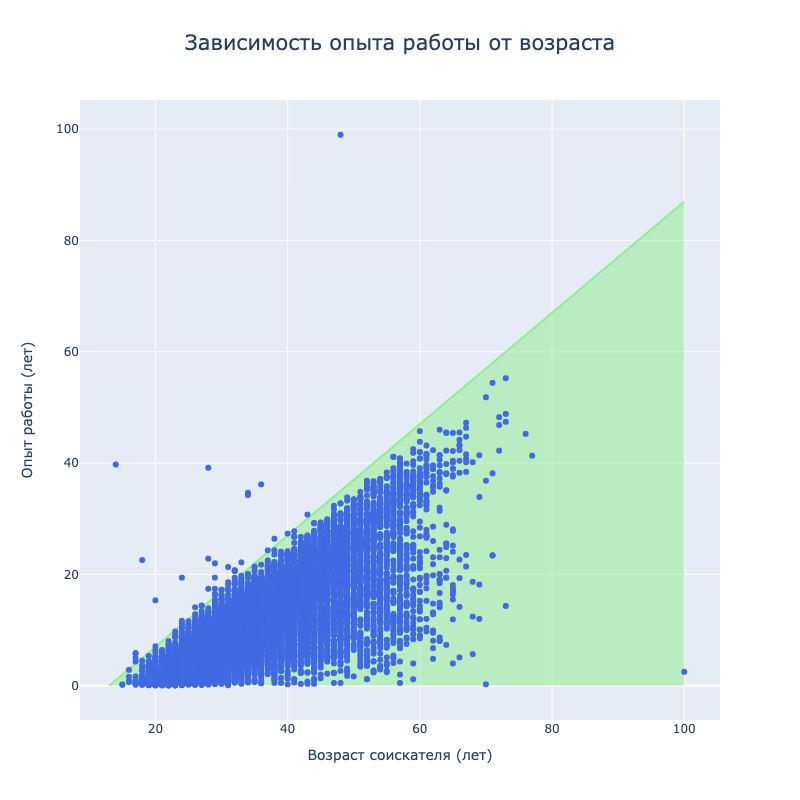

In [554]:
fig = px.line(
    pd.DataFrame({'Возраст соискателя (лет)': [13, 100], 'Опыт работы (лет)': [0, 87]}), 
    x='Возраст соискателя (лет)', y='Опыт работы (лет)', 
    width=800, height=800, 
    title='Зависимость опыта работы от возраста',
    color_discrete_sequence=['lightgreen']
)
fig.update_traces(fill='tozeroy') # ['none', 'tozeroy', 'tozerox', 'tonexty', 'tonextx', 'toself', 'tonext']
fig.add_scatter(
    x=df_hh['Возраст'], 
    y=df_hh['Опыт работы (месяц)'] / 12, 
    mode='markers', 
    showlegend=False,
    marker_color='royalblue'
)
fig.update_layout(title_x=0.5, title_font_size=21)
fig.show(px_mode)

В целом наблюдаем на диаграмме логичную зависимость: с возрастом увеличивается и опыт работы.

Также видно, что после 30 лет уменьшается количество соискателей без опыта работы.

На диаграмме хорошо заметны потенциальные выбросы:
* соискатели, указавшие опыт работы, который превышает их возможный трудовой стаж (считаем, что работать можно с 14 лет), либо ошибочно указавшие возраст;
* соискатели 40+ с очень незначительным опытом работы или без опыта (это не обязательно выбросы, поскольку при смене профессии соискатель может указать отсутствие опыта работы именно в новой сфере) 

# 4. **Дополнительные зависимости признаков**

## 4.1. Зависимость желаемой заработной платы от должности

### Категоризация признака целевой должности соискателя

In [555]:
print("Количество уникальных должностей в исходном датасете:", 
      df_hh['Ищет работу на должность:'].nunique())

Количество уникальных должностей в исходном датасете: 14929


In [556]:
# Посмотрим на топ значений
print(df_hh['Ищет работу на должность:'].value_counts().nlargest(50))

Системный администратор                      3099
Инженер                                       966
Аналитик                                      809
Менеджер проектов                             745
Руководитель проекта                          718
Специалист технической поддержки              695
Руководитель проектов                         669
Технический специалист                        498
Программист                                   475
Менеджер проекта                              471
Специалист по IT                              461
Инженер-программист                           445
Менеджер интернет-магазина                    436
Менеджер                                      374
Оператор                                      371
Специалист                                    337
Сервисный инженер                             306
Интернет-маркетолог                           294
Региональный менеджер по продажам             294
Менеджер по продажам                          269


Объединим "разношерстные" названия должностей в более обобщенные категории и запишем их **в новый признак "Должность"**

In [557]:
def cat_profession(profession: str) ->str:
    if pd.isnull(profession):
        return np.NaN
    
    prof = profession.lower().split(',')[0]

    if 'системн' in prof and 'администратор' in prof:
        return 'Системный администратор'
   
    if ('веб' in prof or 'web' in prof) and ('разработчик' in prof or 'программист' in prof):
        return 'Web-разработчик'
    
    if (('веб' in prof or 'web' in prof) and 'дизайн' in prof) or ('html' in prof and 'верстальщик' in prof):
        return 'Web-дизайнер'
    
    if ('руководитель' in prof and 'проект' in prof) or 'project manager' in prof:
        return 'Руководитель проектов'
    
    if ('1c' in prof or '1с' in prof) and ('разработчик' in prof or 'программист' in prof):
        return 'Программист 1С'
    
    if 'информаци' in prof and ('безопасност' in prof or 'защит' in prof):
        return 'Специалист по инф. безопасности'
    
    if ('it' in prof or ' ит' in prof or 'ит-' in prof or ('информац' in prof and 'технологи' in prof)) and ('специалист' in prof or 'инженер' in prof):
        return 'IT-специалист'
    
    if 'инженер' in prof:
        
        if 'асу' in prof:
            return 'Инженер АСУТП'
        if 'сервис' in prof or 'поддержк' in prof:
            return 'Сервисный инженер'
        if 'ведущий' in prof or 'старший' in prof or 'главный' in prof:
            return 'Ведущий инженер'
        return
    
    if 'специалист' in prof and ('поддержк' in prof or 'helpdesk' in prof):
        return 'Специалист технической поддержки'
    
    if 'ведущий' in prof or 'главный специалист' in prof:
        return 'Ведущий специалист'
    
    if ('руководитель' in prof or 'начальник' in prof) and ('отдел' in prof or 'направлен' in prof or 'подраздел' in prof):
        return 'Руководитель отдела'
    
    if 'оператор' in prof and ('пк' in prof or 'компьютер' in prof):
        return 'Оператор'
    
    if 'электрик' in prof:
        return 'Электрик'
    
    if ('менеджер' in prof or 'координатор' in prof or 'администратор' in prof) and 'проект' in prof:
        return 'Менеджер проекта'
    
    if 'аналитик' in prof:
        return 'Аналитик'
    
    if 'тестировщик' in prof:
        return 'Тестировщик'
    
    if 'программист' in prof:
        return 'Программист'
    
    if 'менеджер' in prof:
        return 'Менеджер'
    
    if ('мастер' in prof or 'сборщик' in prof) and ('компьютер' in prof or 'пк' in prof):
        return 'Мастер по ремонту ПК/сборщик'
    
    if 'модератор' in prof:
        return 'Модератор'
    
    if 'директор' in prof:
        return 'Руководитель'
    
    return profession

df_hh['Должность'] = df_hh['Ищет работу на должность:'].apply(cat_profession)
df_hh['Должность'].value_counts().nlargest(50)

Системный администратор             5084
Менеджер                            3405
Руководитель проектов               2808
IT-специалист                       2149
Руководитель отдела                 2073
Менеджер проекта                    2042
Программист                         1951
Аналитик                            1737
Специалист технической поддержки    1224
Сервисный инженер                    910
Руководитель                         772
Ведущий специалист                   724
Web-разработчик                      629
Ведущий инженер                      595
Программист 1С                       565
Оператор                             524
Технический специалист               498
Тестировщик                          474
Web-дизайнер                         448
Специалист по инф. безопасности      435
Специалист                           337
Инженер АСУТП                        317
Интернет-маркетолог                  294
Frontend-разработчик                 248
Монтажник       

Ознакомившись с получившимся списком, дополнителбно отнесем некоторые названия должностей с уже существующими категориям.

In [558]:
cat_dict = {
    ('QA Engineer', 'Администратор баз данных', 'Специалист по внедрению и сопровождению ПО'): 'IT-специалист',
    ('IOS разработчик', 'PHP-разработчик', 'Гейм-дизайнер', 'Java-разработчик', 'Junior Java Developer'): 'Программист',
    ('SEO-оптимизатор', ): 'SEO-специалист',
    ('Специалист по тестированию', ): 'Тестировщик',
    ('Cистемный администратор',): 'Системный администратор',
    ('Руководитель ИТ',): 'Руководитель',
    ('Руководитель службы технической поддержки', ): 'Руководитель отдела'
}
def cat_profession2(prof: str) ->str:
    global cat_dict
    for key, val in cat_dict.items():
        if prof in key:
            return val
    return prof
df_hh['Должность'] = df_hh['Должность'].apply(cat_profession2)

top_50 = df_hh['Должность'].value_counts().nlargest(50)
print(top_50)

print("\nКоличество уникальных должностей после обработки:", 
      df_hh['Должность'].nunique())

Системный администратор             5106
Менеджер                            3405
Руководитель проектов               2808
IT-специалист                       2267
Программист                         2138
Руководитель отдела                 2099
Менеджер проекта                    2042
Аналитик                            1737
Специалист технической поддержки    1224
Сервисный инженер                    910
Руководитель                         810
Ведущий специалист                   724
Web-разработчик                      629
Ведущий инженер                      595
Программист 1С                       565
Оператор                             524
Тестировщик                          500
Технический специалист               498
Web-дизайнер                         448
Специалист по инф. безопасности      435
Специалист                           337
Инженер АСУТП                        317
Интернет-маркетолог                  294
Frontend-разработчик                 248
Монтажник       

Итак, нам удалось почти втрое сократить номенклатуру желаемых должностей!

Оставим в признаке топ-50 должностей, а остальные заменим на категорию "ДРУГОЕ".

In [559]:
df_hh['Должность'] = df_hh['Должность'].apply(lambda x: x if x in top_50 else 'ДРУГОЕ').astype('category')

### Должности (профессии) с наибольшей ожидаемой заработной платой
После обработки и категоризации признака должности, отобразим на диаграмме соотношение размеров желаемой заработной платы (будем учитывать только заработные платы <= 1 млн.руб. и >= 1 тыс.руб.:

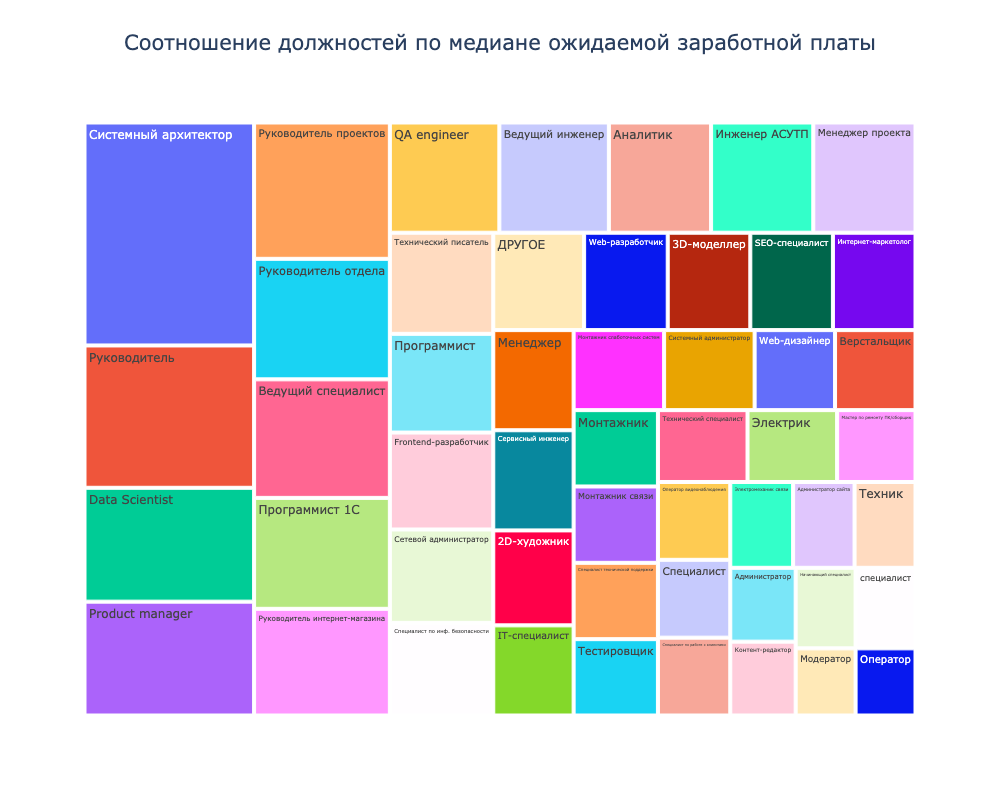

In [560]:
mask = (df_hh['ЗП (руб)'] <= 1000000) & (df_hh['ЗП (руб)'] >= 1000)
fig = px.treemap(
    df_hh[mask].groupby('Должность', as_index=False)['ЗП (руб)'].median(),
    path=['Должность'],
    values='ЗП (руб)',
    width=1000,
    height=800,
    title='Соотношение должностей по медиане ожидаемой заработной платы'
)
fig.update_layout(title_x=0.5, title_font_size=21)
fig.show(px_mode)

Как видим, наиболее амбициозными являются соискатели на должности: системного архитектора, руководителя, продакт-менеджера, дэйта-сайнтиста (почетное третье место!), руководителя проектов, руководителя отдела, ведущего специалиста, программиста 1С и руководителя интернет-магазина.

Выведем отдельно диаграмму топ-15:

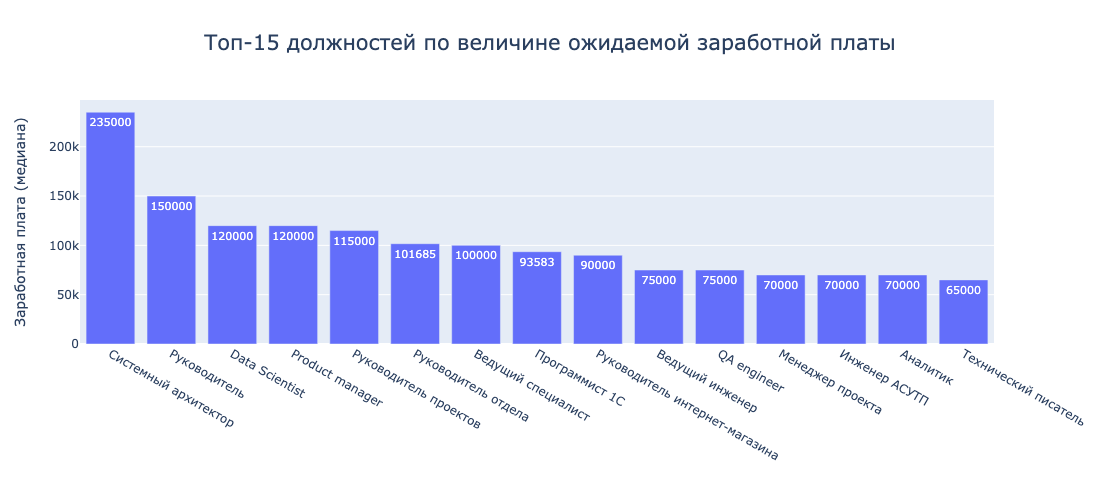

In [561]:
mask = (df_hh['ЗП (руб)'] <= 1000000) & (df_hh['ЗП (руб)'] >= 1000)
fig = px.bar(
    df_hh[mask].groupby('Должность', as_index=False)['ЗП (руб)'].median().round().sort_values('ЗП (руб)', ascending=False)[:15],
    y='ЗП (руб)',
    x='Должность',
    text='ЗП (руб)',
    width=1100,
    height=500,
    title='Топ-15 должностей по величине ожидаемой заработной платы',
    labels={'ЗП (руб)': 'Заработная плата (медиана)', 'Должность': ''}
)
fig.update_layout(title_x=0.5, title_font_size=21)
fig.update_traces(textfont_size=11)
#fig.update_yaxes(showticklabels=False)
fig.show(px_mode)

Соискатели на должность системного архитектора расчитывают на самый высокий доход (медиана = 235 тыс.руб.).

На втором месте - объединенная категория "Руководитель". Конечно, руководители бывают разные и внутри данной категории мы наблюдаем значительный разброс величины желаемой заработной платы - (см. диаграмму ниже).

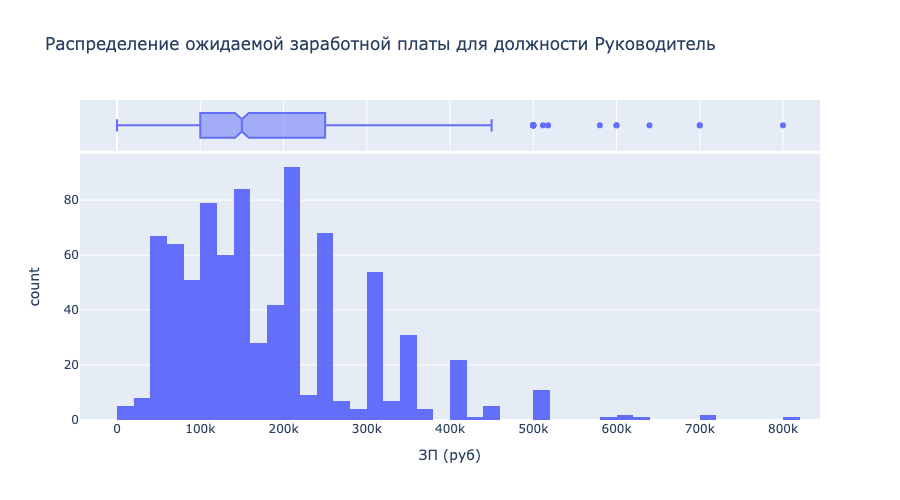

In [562]:
fig = px.histogram(
    df_hh[df_hh['Должность'] == 'Руководитель'], 
    x='ЗП (руб)',
    marginal='box',
    width=900, height=500,
    title='Распределение ожидаемой заработной платы для должности Руководитель'
)
fig.show(px_mode)

### Топ-15 популярных должностей среди соискателей
Тот факт, что какая-либо должность высоко оплачивается, еще не означает, что она популярна. Выведем диаграмму популярности желаемых должностей (отдельно для мужчин и для женщин):

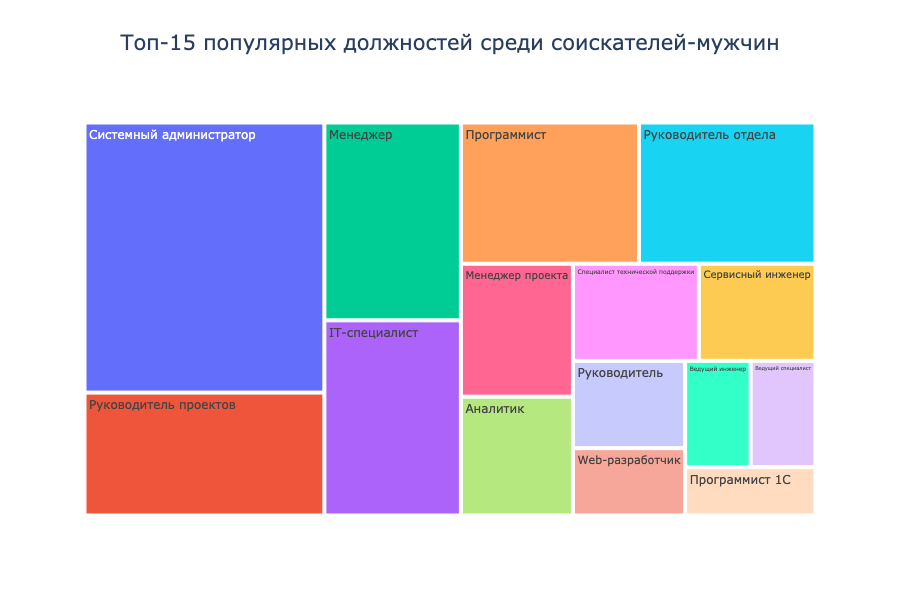

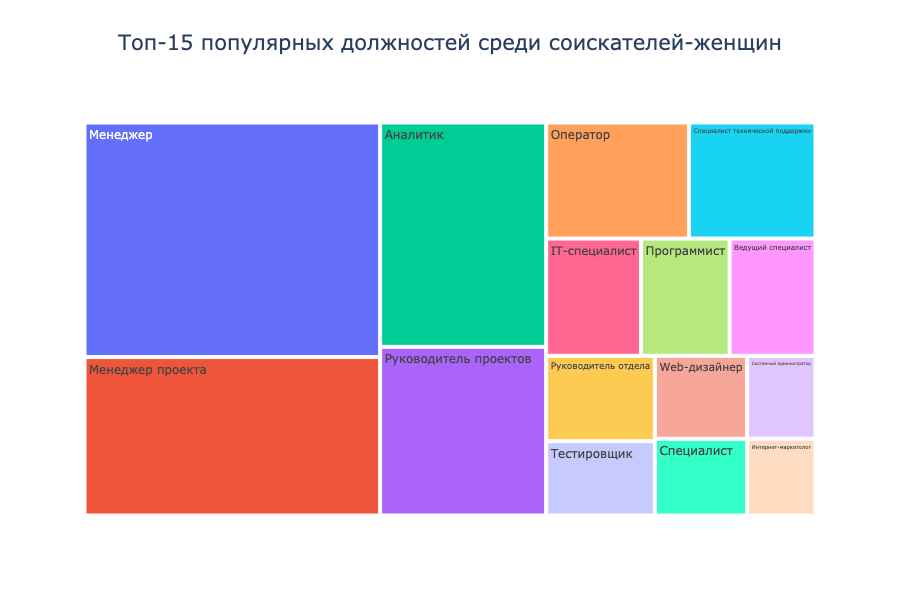

In [563]:
 for gender in ['мужчин', 'женщин']:
    mask = df_hh['Пол'] == gender[0].upper()
    # Не берем самую частую категорию - "ДРУГОЕ" (пропускаем индекс 0)
    data = df_hh[mask]['Должность'].value_counts()[1:16]
    data = pd.DataFrame({'Должность': data.index, 'count': data.values})

    fig = px.treemap(
        data,
        path=['Должность'],
        values='count',
        width=900,
        height=600,
        title='Топ-15 популярных должностей среди соискателей-' + gender
    )
    fig.update_layout(title_x=0.5, title_font_size=21)
    fig.show(px_mode)

На диаграммах видно, что у мужчин и женщин по разному распеделился Топ популярных желамый должностей.

## 4.2. Зависимость желаемой заработной платы от города и уровня образования соискателя

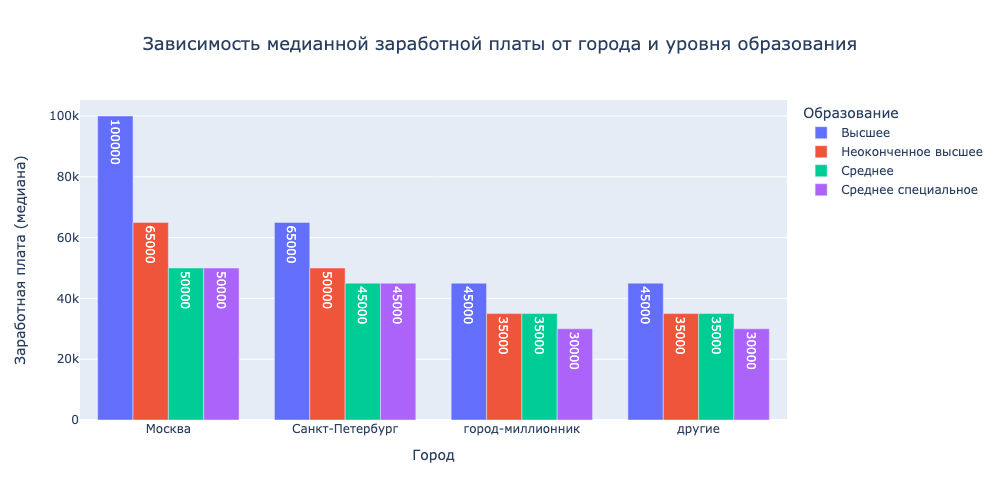

In [564]:
fig = px.bar(
    df_hh.groupby(['Город', 'Образование'], as_index=False)['ЗП (руб)'].median(),
    y='ЗП (руб)',
    x='Город',
    color='Образование',
    width=1000, height=500,
    text='ЗП (руб)',
    barmode='group',
    title='Зависимость медианной заработной платы от города и уровня образования',
    labels={'ЗП (руб)': 'Заработная плата (медиана)'},
)
fig.update_traces(textfont_color='white', textfont_size=12, showlegend=True)
fig.update_layout(title_x=0.5, title_font_size=18)
fig.show(px_mode)

Наиболее значительное преимущество по уровню ожидаемой заработной платы имеют соискатели с высшим образованием в Москве - они планируют зарабатывать около 100 тыс.руб. в месяц.

Диаграмма также подтверждает ранее сделанное наблюдение о том, что ожидания по оплате труда в категориях "город-милионник" и "другие" идентичны (в том числе в разрезе уровня образования)

## 4.3. Зависимость желаемой заработной платы от пола и уровня образования соискателя

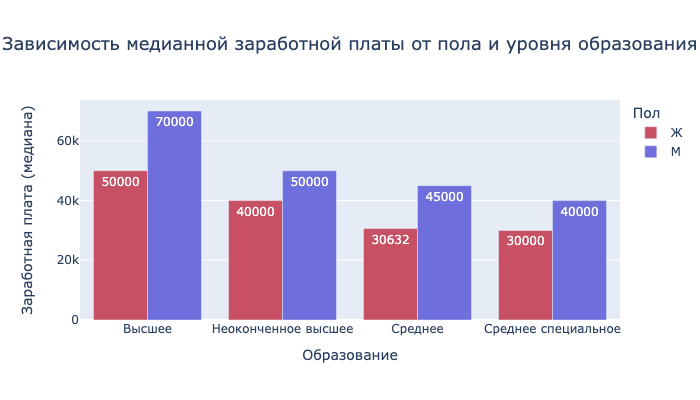

In [565]:
fig = px.bar(
    df_hh.groupby(['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median(),
    y='ЗП (руб)',
    color='Пол',
    x='Образование',
    width=700, height=400,
    text='ЗП (руб)',
    barmode='group',
    title='Зависимость медианной заработной платы от пола и уровня образования',
    labels={'ЗП (руб)': 'Заработная плата (медиана)'},
    color_discrete_sequence=['rgb(200,80,100)', 'rgb(110,110,220)']
)
fig.update_traces(textfont_color='white', textfont_size=12, showlegend=True)
fig.update_layout(title_x=0.5, title_font_size=18)
fig.show(px_mode)

Традиционно - мужчины расчитывают на более высокую заработную плату, чем женщины. Причем это не зависит от уровня образования.

## 4.4. Предпочтения соискателей по типу занятости и графику работы
Покажем, каким долям соискателей (процент от числа всех резюме) соответствуют созданные нами ранее признаки-мигалки (типы занятости и типы рабочий графиков).

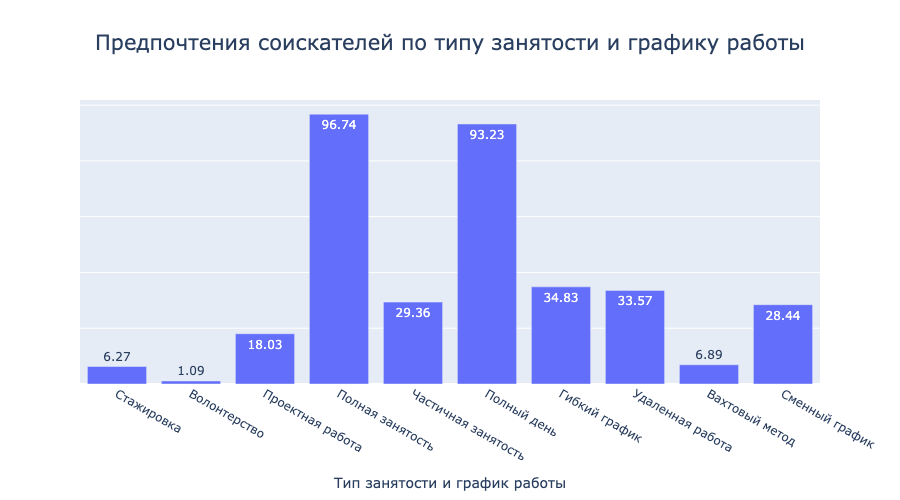

In [566]:
data = round(df_hh[[cat.capitalize() for cat in (list(employment) + list(schedule))]].mean() * 100, 2)
fig = px.bar(
    data, 
    width=900,
    height=500,
    title='Предпочтения соискателей по типу занятости и графику работы',
    text=data
)
fig.update_traces(showlegend=False)
fig.update_layout(title_x=0.5, title_font_size=21)
fig.update_yaxes(title='', showticklabels=False) # visible=False
fig.update_xaxes(title='Тип занятости и график работы')
fig.show(px_mode)

Почти все соискатели (97 %) находят для себя подходящей полную занятость, а 93% соискателей готовы к рабочему графику на полный день.

Категории частичной занятости, сменного и гибкого графика, удаленной работы также шиороко распространены в резюме соискателей.

А вот желающих найти новую работу для стажировки совсем не много - 6%.

Еще меньше - волонтеров (1%). Но с ними не всё очевидно - большинство волонтеров ожидают заработную плату от 30000 до 80000 руб. (см. диаграмму ниже).

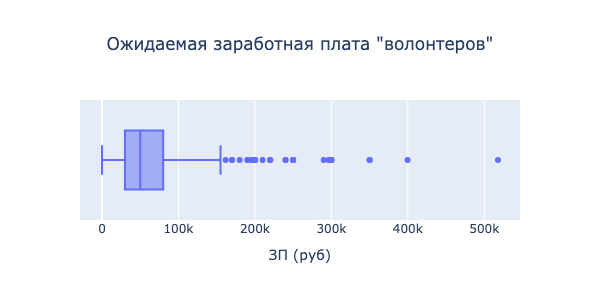

In [567]:
fig=px.box(
    df_hh[df_hh['Волонтерство'] == True], 
    x='ЗП (руб)', 
    width=600, height=300,
    title='Ожидаемая заработная плата "волонтеров"'
)
fig.update_layout(title_x=0.5)
fig.show(px_mode)

# 5. Очистка данных

## 5.1. Удаление полных дубликатов

In [568]:
print("Количество полных дубликатов в датасете:", df_hh.duplicated().sum())

df_hh.drop_duplicates(inplace=True)

Количество полных дубликатов в датасете: 161


## 5.2. Информация **о числе пропусков** в столбцах

In [569]:
null_count = df_hh.isnull().sum()
null_count[null_count > 0]

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

## 5.3. Устранение пропусков
Итак, у нас есть пропуски встолбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. 

Удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним **медианным** значением.

In [570]:
df_hh.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], axis=0, inplace=True)
df_hh.fillna({'Опыт работы (месяц)': df_hh['Опыт работы (месяц)'].median()}, inplace=True)

print("Результирующее среднее значение опыта работы:", 
      df_hh['Опыт работы (месяц)'].mean().round(), "мес.")

Результирующее среднее значение опыта работы: 114.0 мес.


## 5.4. Удаление выбросов вручную

Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [571]:
mask = (df_hh['ЗП (руб)'] > 1000000) | (df_hh['ЗП (руб)'] < 1000)

print("Найдено", df_hh[mask].shape[0], 
       "резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей")

df_hh.drop(df_hh[mask].index, inplace=True)

Найдено 89 резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей


## 5.5. Опыт работы больше возраста
В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Удалим их:


In [572]:
mask = df_hh['Опыт работы (месяц)'] / 12 >= df_hh['Возраст']

print("Найдено", df_hh[mask].shape[0], "резюме, в которых опыт работы в годах превышает возраст соискателя")

df_hh.drop(df_hh[mask].index, inplace=True)

Найдено 7 резюме, в которых опыт работы в годах превышает возраст соискателя


## 5.6. Удаление выбросов в признаке "Возраст" методом z-отклонения
В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. 

Построим распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**.

Найдем и удалим выбросы с помощью метода z-отклонения, используя логарифмический масштаб. Сделаем послабление на **1 сигму** (возьмем 4 сигмы) в **правую сторону**.

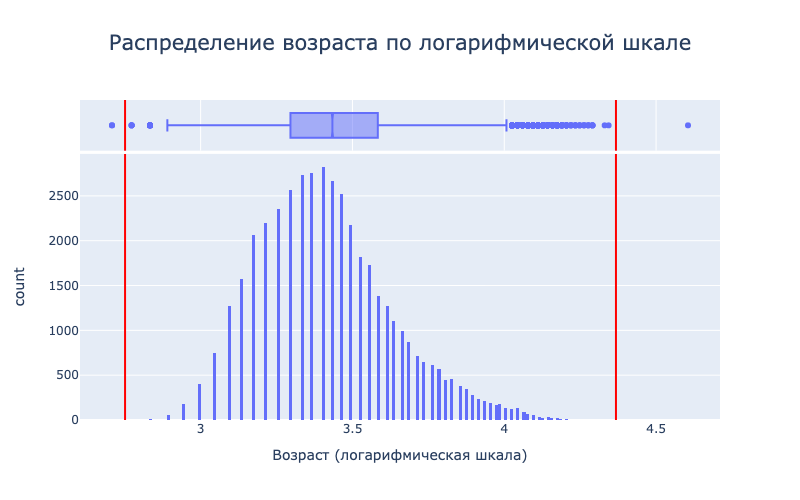

Правая ассиметрия, показатель = 0.4523422276053838


In [573]:
def z_bounds(data: pd.Series, left: int=3, right: int=3):
    mu = data.mean()
    sigma = data.std()
    return mu - left * sigma, mu + right * sigma

age_log = np.log(df_hh['Возраст'])

left_bnd, right_bnd = z_bounds(age_log, right=4)

fig = px.histogram(
    age_log, 
    x='Возраст', 
    width=800, height=500, 
    marginal='box', 
    labels={'Возраст': 'Возраст (логарифмическая шкала)'},
    title='Распределение возраста по логарифмической шкале'
)
fig.add_vline(x=left_bnd, line=dict(color='red'))
fig.add_vline(x=right_bnd, line=dict(color='red'))
fig.update_layout(title_x=0.5, title_font_size=21)    
fig.show(px_mode)

print("Правая ассиметрия, показатель =", age_log.skew())

In [574]:
def outliers_z(df: pd.DataFrame, col: str, log_scale: bool=False, left: int=3, right: int=3):
    x = np.log(df[col]) if log_scale else df[col]
    sigma = x.std()
    mu = x.mean()
    mask_outliers = (x < mu - left * sigma) | (x > mu + right * sigma)
    mask_cleaned = (x > mu - left * sigma) & (x < mu + right * sigma)
    return df[mask_outliers], df[mask_cleaned]

df_outliers, df_hh = outliers_z(df_hh, 'Возраст', log_scale=True, right=4)
df_outliers

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,Полная занятость,Частичная занятость,Полный день,Гибкий график,Удаленная работа,Вахтовый метод,Сменный график,ЗП (руб),Возрастная группа,Должность
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,False,True,False,True,True,False,True,10000.0,15-20,Менеджер
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,Среднее специальное,М,15,3.0,другие,...,True,False,True,False,False,False,False,2000.0,15-20,Тестировщик
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,True,True,False,False,60000.0,100-105,Frontend-разработчик


Итак, согласно заданию мы удалили одно резюме, в котором указан возраст 100 лет.

Также были удалены двое "слишком молодых" соискателей - по 15 лет. Однако данные резюме не противоречат здравому смыслу: во-первых возраст 15 лет согласуется с ТК; во-вторых, укзанный опыт работы (2 и 3 месяца) соответствует возрасту.